In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from scipy import stats
import statsmodels.api as sm


In [6]:
df=pd.read_csv(r'C:\Users\Keyur Mistry\Desktop\ML_project\src\notebook\data\StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
X = df.drop('math score', axis=1)

In [9]:
Y = df['math score']

In [10]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [12]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create the transformer for both one-hot encoding and standard scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  # This keeps all other columns in the DataFrame
)
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(800, 19)

In [16]:
X_test.shape

(200, 19)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(values_true, values_pred):
    """
    Calculates and returns common regression metrics: MAE, MSE, and R^2.
    
    Parameters:
        values_true (array-like): True values.
        values_pred (array-like): Predicted values.
    
    Returns:
        dict: A dictionary containing the MAE, MSE, and R^2 scores.
    """
    mae = mean_absolute_error(values_true, values_pred)
    mse = mean_squared_error(values_true, values_pred)
    r2 = r2_score(values_true, values_pred)
    
    metrics = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }
    
    return metrics


In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet Regression', ElasticNet()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('KNN Regressor', KNeighborsRegressor()),
    ('XGBoost Regressor', XGBRegressor(random_state=42)),
    ('CatBoost Regressor', CatBoostRegressor(random_state=42, verbose=0)),  # verbose=0 to keep the output clean
    ('Support Vector Regression', SVR())
]

def evaluate_models(models, X_train, Y_train, X_test, Y_test):
    results = {}
    for name, model in models:
        # Train the model
        model.fit(X_train, Y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Calculate metrics
        metrics = calculate_metrics(Y_test, y_pred)
        results[name] = metrics
    return results

def print_model_results(results):
    for model_name, metrics in results.items():
        print(f"Model: {model_name}")
        for metric_name, metric_value in metrics.items():
            print(f"  {metric_name}: {metric_value:.4f}")
        print()  # Newline for better separation

# Assuming X_train, y_train, X_test, y_test are already defined
model_results = evaluate_models(models, X_train, Y_train, X_test, Y_test)
print_model_results(model_results)

Model: Linear Regression
  Mean Absolute Error: 4.2222
  Mean Squared Error: 29.4326
  R^2 Score: 0.8790

Model: Ridge Regression
  Mean Absolute Error: 4.2111
  Mean Squared Error: 29.0563
  R^2 Score: 0.8806

Model: Lasso Regression
  Mean Absolute Error: 5.1579
  Mean Squared Error: 42.5064
  R^2 Score: 0.8253

Model: ElasticNet Regression
  Mean Absolute Error: 6.3901
  Mean Squared Error: 63.3594
  R^2 Score: 0.7396

Model: Random Forest
  Mean Absolute Error: 4.6649
  Mean Squared Error: 36.2125
  R^2 Score: 0.8512

Model: Gradient Boosting
  Mean Absolute Error: 4.3123
  Mean Squared Error: 31.1450
  R^2 Score: 0.8720

Model: Decision Tree
  Mean Absolute Error: 6.1950
  Mean Squared Error: 59.5150
  R^2 Score: 0.7554

Model: KNN Regressor
  Mean Absolute Error: 5.6210
  Mean Squared Error: 52.6066
  R^2 Score: 0.7838

Model: XGBoost Regressor
  Mean Absolute Error: 5.0577
  Mean Squared Error: 41.9037
  R^2 Score: 0.8278

Model: CatBoost Regressor
  Mean Absolute Error: 4.6015


In [25]:
sorted_results = sorted(model_results.items(), key=lambda x: x[1]['R^2 Score'], reverse=True)

# Convert sorted results to DataFrame

results_df = pd.DataFrame({
    'Model': [model_name for model_name, _ in sorted_results],
    'R^2 Score': [metrics['R^2 Score'] for _, metrics in sorted_results]
})

# Print the DataFrame
print(results_df)

                        Model  R^2 Score
0            Ridge Regression   0.880593
1           Linear Regression   0.879046
2           Gradient Boosting   0.872010
3               Random Forest   0.851185
4          CatBoost Regressor   0.850185
5           XGBoost Regressor   0.827797
6            Lasso Regression   0.825320
7               KNN Regressor   0.783813
8               Decision Tree   0.755423
9       ElasticNet Regression   0.739624
10  Support Vector Regression   0.728600


In [33]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, Y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate metrics
metrics = calculate_metrics(Y_test, y_pred)

# Calculate and print accuracy
accuracy = r2_score(Y_test, y_pred)
# Calculate and print accuracy as a percentage
accuracy_percentage = accuracy * 100
print(f"Accuracy of Linear Regression model: {accuracy_percentage:.2f}%")


Accuracy of Linear Regression model: 87.90%


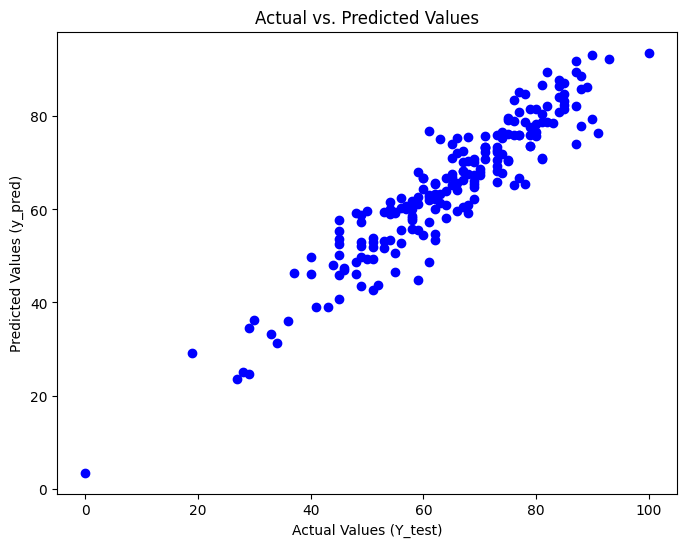

In [34]:
import matplotlib.pyplot as plt

# Plotting Y_test against y_pred
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

In [37]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Values (Y_test)': Y_test,
    'Predicted Values (y_pred)': y_pred
})

# Calculate the difference between Y_test and y_pred and add it as a new column
results_df['Difference'] = results_df['Actual Values (Y_test)'] - results_df['Predicted Values (y_pred)']

# Display the updated DataFrame with the difference column
print(results_df)

     Actual Values (Y_test)  Predicted Values (y_pred)  Difference
521                      91                    76.4375     14.5625
737                      53                    59.3125     -6.3125
740                      80                    76.6250      3.3750
660                      74                    76.5625     -2.5625
411                      84                    87.7500     -3.7500
..                      ...                        ...         ...
408                      52                    43.6875      8.3125
332                      62                    62.3125     -0.3125
208                      74                    67.7500      6.2500
613                      65                    67.0000     -2.0000
78                       61                    62.6875     -1.6875

[200 rows x 3 columns]
